In [1]:
from app import create_app
from app.instrument import Instrument
from app.analysis import Quote
mappings= {'BRK.B': 'BRK-B'}
with create_app().app_context():
    provided = ['SPLV']
    quote = Quote([b.symbol if b.symbol not in mappings else mappings[b.symbol]
                   for b in Instrument.find_stocks(200)] + provided, 120)
f'from {quote.start.date()} to {quote.end.date()}'

'from 2019-02-20 to 2019-06-20'

In [16]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 8) & (stat['21-mean'] > 0.8)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
MCD,64,3.501918,1.472278,2.265368,2.999196
MA,64,4.426696,1.975705,2.156208,5.698715
KO,64,3.814283,1.691957,2.155857,3.383609
WM,64,3.900462,2.020398,1.848050,3.316666
SHOP,64,15.058791,8.734161,1.705043,6.171438
SBUX,64,4.323446,2.818152,1.475002,4.600183
V,64,3.696686,2.436573,1.448764,4.317938
PYPL,64,4.891330,3.366749,1.403331,7.332929
ENPH,64,24.827225,17.952433,1.373661,6.875388


In [20]:
quote.setup_mask([*stat.index, *provided])
quote.least_correlated_portfolio(21, 3, provided, cr=3, dr=4)

['SPLV', 'MCD', 'MA'] 12.931332779731331 3.3112784642632613 2.528126554260313 -7.1150088300997085
['SPLV', 'MCD', 'KO'] 11.186207527754444 3.3468147074754366 2.0651053446844507 -7.114657973409667
['SPLV', 'MCD', 'WM'] 10.86921937734894 3.156400937835814 2.051716781232609 -6.806850561088936
['SPLV', 'MCD', 'SHOP'] 8.392921389277411 1.5220270926899708 2.622671139547676 -6.663844446983206
['SPLV', 'MCD', 'ENPH'] 7.601442042902912 0.9600198114606115 2.763461171279085 -6.332462076595263


['SPLV', 'MCD', 'ENPH']

In [21]:
quote.setup_mask(['MCD', 'ENPH'])
quote.find_optimal_ratio(21, 8)

     fun: 1.7339583160696483
     jac: array([3.46909344, 3.43588126])
 message: 'Optimization terminated successfully.'
    nfev: 8
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([0.96457267, 0.03542733])


/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


({'MCD': 0.9645726695521555, 'ENPH': 0.03542733044784463}, 4.2574, 1.3168)

Populating the interactive namespace from numpy and matplotlib


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,64.0,4.498850,1.303120,1.802909,3.592294,4.624611,5.360425,7.203159,3.324471,3.172174
MCD,64.0,3.501918,1.472278,-0.558029,2.814227,3.754690,4.312614,6.412885,2.265368,2.999196
ENPH,64.0,24.827225,17.952433,-1.066102,9.973462,19.582932,39.813597,60.344833,1.373661,6.875388


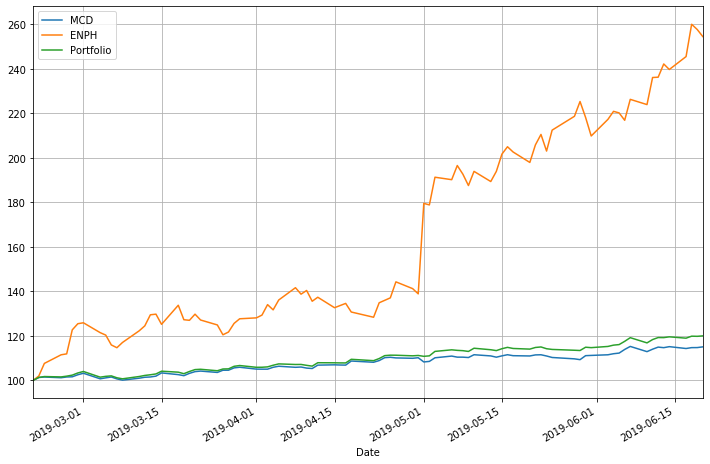

In [22]:
%pylab inline
quote.graph(21, {'MCD': 0.96457267, 'ENPH': 0.03542733})

In [ ]:
%pylab inline
Quote(['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV', 'TMF', 'UPRO', 'MCD', 'ENPH', 'CTRP'], 120).graph(21,
    {'MUB': .160, 'PGX': .140,
     'BXMT': .120, 'VNQ': .080,
     'SPLV': .200,
     'TMF': .113, 'UPRO': .087,
     'MCD': .096, 'ENPH': .004})